# Présentation des données

Ces données sont le résultat d'une analyse chimique de vins cultivés dans la même région en Italie mais issus de trois cultivars différents. L'analyse a déterminé les quantités de 13 constituants présents dans chacun des trois types de vins.Il semble que l'ensemble de données initial comportait environ 30 variables, mais pour une raison quelconque, il n'y a que la version à 13 dimensions.

Les attributs sont (donnés par Riccardo Leardi, riclea@anchem.unige.it ) 

    1)  Alcool 
    2)  Acide malique 
    3)  Cendres 
    4)  Alcalinité des cendres 
    5)  Magnésium 
    6)  Phénols totaux 
    7)  Flavonoïdes 
    8)  Phénols non flavonoïdes 
    9)  Proanthocyanines 
    10) Intensité de la couleur 
    11) Teinte 
    12) OD280/OD315 des vins dilués 
    13) Proline
    
Sources : https://archive.ics.uci.edu/dataset/109/wine

🛑 *Attention la colonne Proline possède un espace dans son nom (à la fin)*

## Importation des packages et importer les données

In [1]:
#Importation des packages

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import ipywidgets as widgets
from IPython.display import display

In [2]:
# importation et visualisation des premières lignes

df=pd.read_csv("C:/Users/PC/Desktop/données/Wine dataset.csv")
df.head()

class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline   
0             5.64  1.04                          3.92      1065  
1             4.38  1.05                          3.40      1050  
2             5.68  1.03                          3.17      1185  
3             7.80  0.86                          3.45      1480  
4             4.32  1.04                          2.93       735

In [3]:
#Analyse de la dimension de la base de données


df.shape

(178, 14)

In [4]:
# Analyse du type de variable dans la base de données

df.dtypes

class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

#### La colonne class est composée d'entiers : int64.
#### Pour identifier le cultivar, il vaut mieux faire correspondre des chaines de caractères correspondantes au cultivar. 

In [5]:
# modification de l'identification des cultivars
df_copied = df.copy()

for index, row in df_copied.iterrows():
    if row['class'] == 1:
        df_copied.loc[index, 'class'] = 'Cultivar 1'
    elif row['class'] == 2:
        df_copied.loc[index, 'class'] = 'Cultivar 2'
    elif row['class'] == 3:
        df_copied.loc[index, 'class'] = 'Cultivar 3'

df=df_copied
df

class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0    Cultivar 1    14.23        1.71  2.43               15.6        127   
1    Cultivar 1    13.20        1.78  2.14               11.2        100   
2    Cultivar 1    13.16        2.36  2.67               18.6        101   
3    Cultivar 1    14.37        1.95  2.50               16.8        113   
4    Cultivar 1    13.24        2.59  2.87               21.0        118   
..          ...      ...         ...   ...                ...        ...   
173  Cultivar 3    13.71        5.65  2.45               20.5         95   
174  Cultivar 3    13.40        3.91  2.48               23.0        102   
175  Cultivar 3    13.27        4.28  2.26               20.0        120   
176  Cultivar 3    13.17        2.59  2.37               20.0        120   
177  Cultivar 3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline   
0               5.64  1.04                          3.92      1065  
1               4.38  1.05                          3.40      1050  
2               5.68  1.03                          3.17      1185  
3               7.80  0.86                          3.45      1480  
4               4.32  1.04                          2.93       735  
..               ...   ...                           ...       ...  
173             7.70  0.64                          1.74       740  
174             7.30  0.70                          1.56       750  
175            10.20  0.59                          1.56       835  
176             9.30  0.60                          1.62       840  
177             9.20  0.61                          1.60       560  

[178 rows x 14 columns]

In [6]:
df.dtypes

class                            object
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [7]:
# Analyse de données manquantes

df.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

Pas de données absentes dans notre jeu de données

## Analyses descriptives univariées

In [8]:
# Analyse descriptive du jeu de données
df.describe()

Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensity         Hue  OD280/OD315 of diluted wines     Proline   
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [9]:
# Description des variables qualitatives
df.describe(include="object")

class
count          178
unique           3
top     Cultivar 2
freq            71

<Axes: >

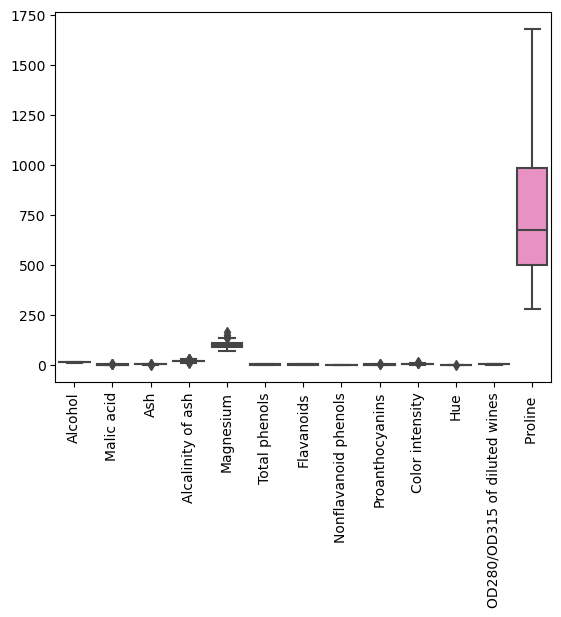

In [10]:
# Analyse descriptive des variables quantitatives
plt.xticks(rotation=90)
sns.boxplot(data=df)

La grandeur des données 'proline' et magnésium rend peu lisible le graphe précedent.En reprenant sans la colonne proline, ni magnésium l'interprétation du jeu de données sera plus facile.

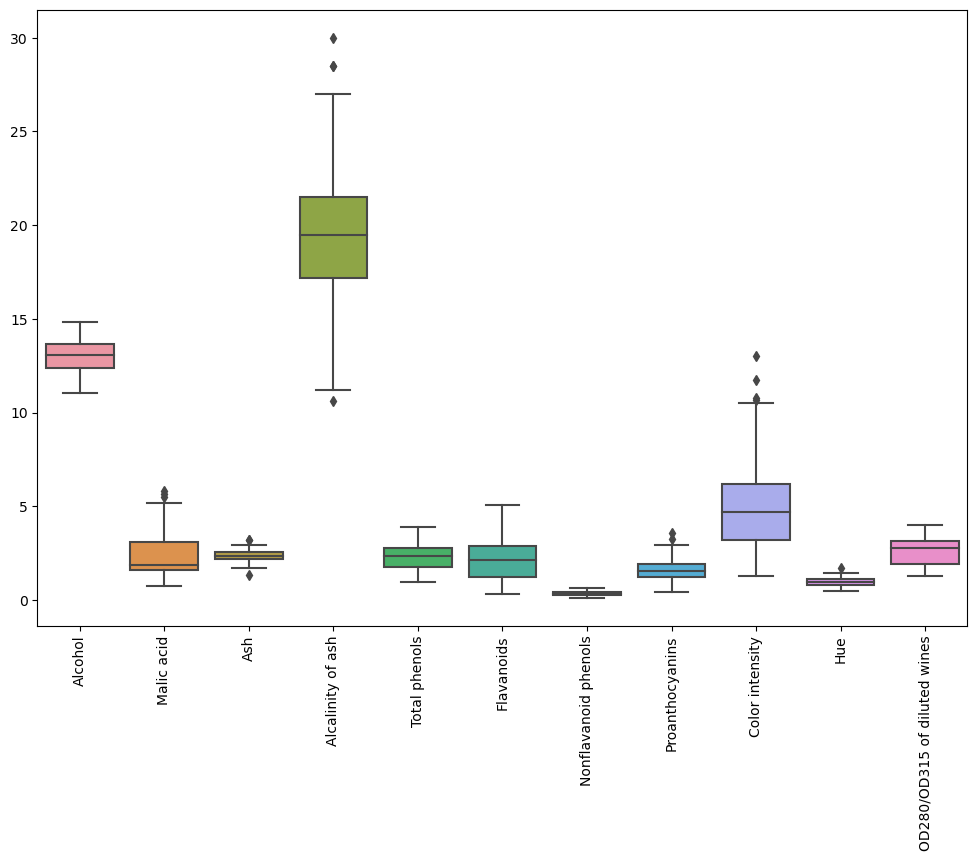

In [11]:
# Analyse descriptive des variables quantitatives (sans la colonne proline ni magnésium)
# Sélection des colonnes à inclure 
columns_to_include = [col for i, col in enumerate(df.columns) if i != len(df.columns)-1 and i !=5 ]


plt.figure(figsize=(12, 8))
plt.tight_layout()
plt.xticks(rotation=90)

# Création du sous-dataframe avec les colonnes sélectionnées
df_subset = df[columns_to_include]

# Affichage des boxplots
sns.boxplot(data=df_subset)
plt.show()

In [12]:
columns_to_include = [col for i, col in enumerate(df.columns) if i != len(df.columns)-1 and i != 5]

# Création du sous-dataframe avec les colonnes sélectionnées
df_subset = df[columns_to_include]

# Liste des cultivars à traiter
cultivars = ['Cultivar 1', 'Cultivar 2', 'Cultivar 3']

# Création des graphiques pour chaque cultivar
graphs = []
for cultivar in cultivars:
    # Création du graphique pour le cultivar
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(data=df_subset[df['class'] == cultivar], ax=ax)
    ax.set_title(cultivar)
    ax.grid(True)
    ax.tick_params(axis='y', rotation=90)
    plt.close(fig)  # Fermer le graphique pour éviter son affichage par défaut
    
    # Ajout du graphique à la liste des widgets
    graphs.append(widgets.Output(layout={'overflow': 'auto'}))
    with graphs[-1]:
        display(fig)

# Création de l'accordéon
accordion = widgets.Accordion(children=graphs)
for i, cultivar in enumerate(cultivars):
    accordion.set_title(i, cultivar)

# Affichage de l'accordéon
display(accordion)

Accordion(children=(Output(layout=Layout(overflow='auto')), Output(layout=Layout(overflow='auto')), Output(lay…

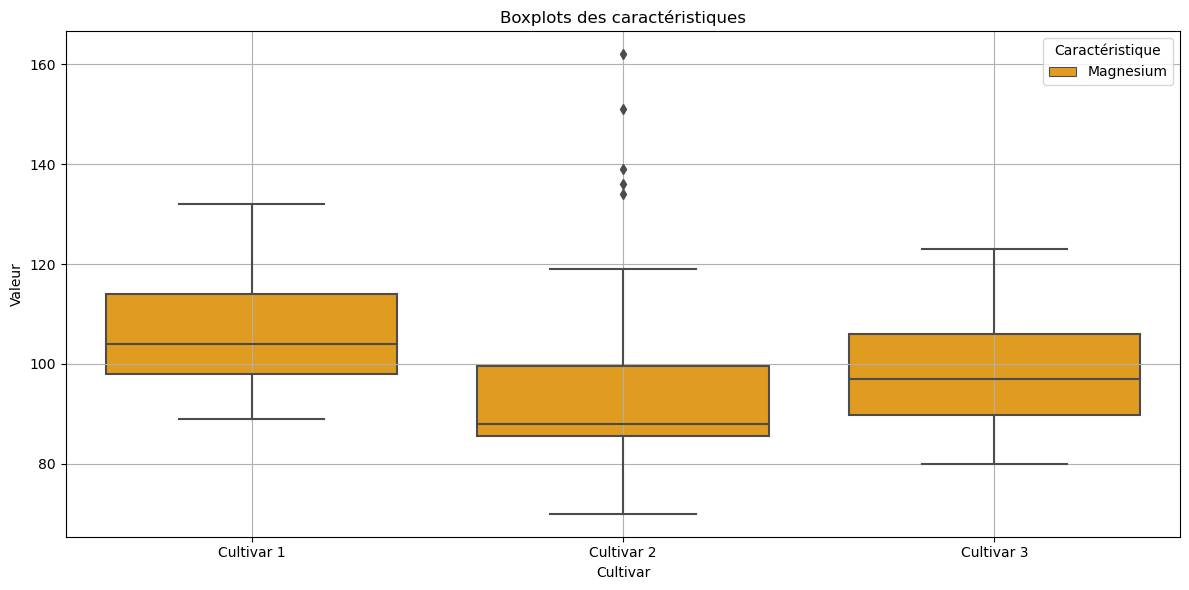

In [13]:
# Création du sous-dataframe avec les colonnes sélectionnées
df_subset = df.loc[:, ['Magnesium']]

# Liste des cultivars à traiter
cultivars = ['Cultivar 1', 'Cultivar 2', 'Cultivar 3']

# Convertir les colonnes en une seule colonne
df_melt = pd.melt(df_subset, var_name='Caractéristique', value_name='Valeur')

# Création du graphique
fig, ax = plt.subplots(figsize=(12, 6))

# Tracer les boxplots pour chaque cultivar
sns.boxplot(data=df_melt, x=df['class'], y='Valeur', hue='Caractéristique', ax=ax, palette =['orange'] )

# Personnalisation de l'axe x et du titre
ax.set_xticklabels(cultivars)  # Remplacer les étiquettes de l'axe x par les noms de cultivars
ax.set_xlabel('Cultivar')
ax.set_title('Boxplots des caractéristiques')

# Afficher la grille et ajuster l'espacement
ax.grid(True)
plt.tight_layout()

# Afficher le diagramme de boîte
plt.show()

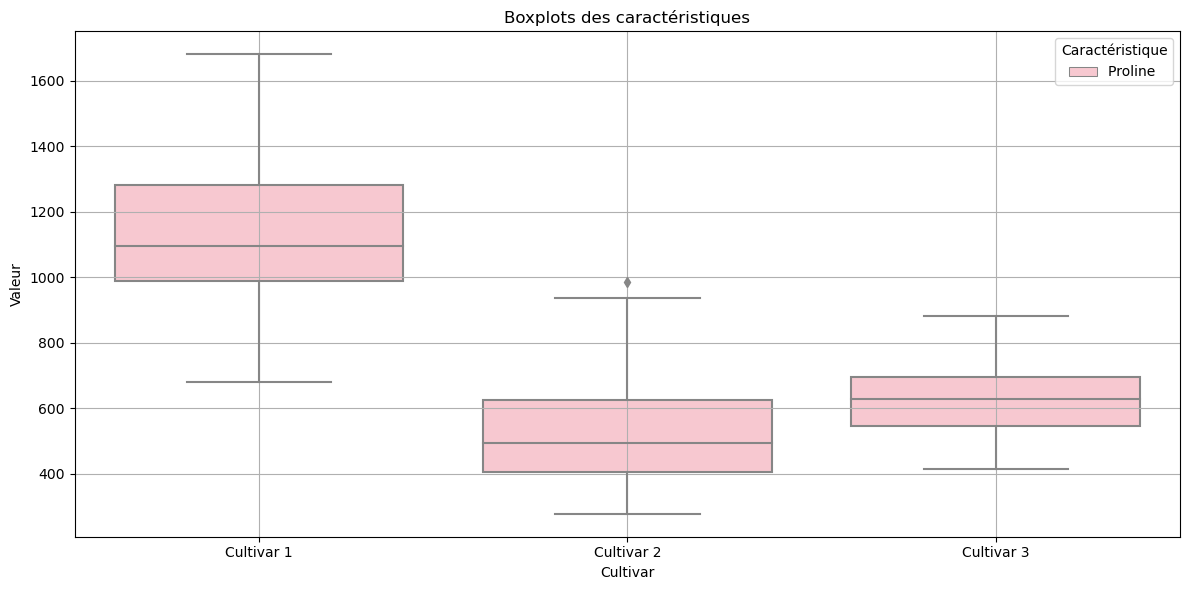

In [14]:
# Création du sous-dataframe avec les colonnes sélectionnées
df_subset = df.loc[:, ['Proline ']]

# Liste des cultivars à traiter
cultivars = ['Cultivar 1', 'Cultivar 2', 'Cultivar 3']

# Convertir les colonnes en une seule colonne
df_melt = pd.melt(df_subset, var_name='Caractéristique', value_name='Valeur')

# Création du graphique
fig, ax = plt.subplots(figsize=(12, 6))

# Tracer les boxplots pour chaque cultivar
sns.boxplot(data=df_melt, x=df['class'], y='Valeur', hue='Caractéristique', ax=ax, palette =['pink'] )

# Personnalisation de l'axe x et du titre
ax.set_xticklabels(cultivars)  # Remplacer les étiquettes de l'axe x par les noms de cultivars
ax.set_xlabel('Cultivar')
ax.set_title('Boxplots des caractéristiques')

# Afficher la grille et ajuster l'espacement
ax.grid(True)
plt.tight_layout()

# Afficher le diagramme de boîte
plt.show()

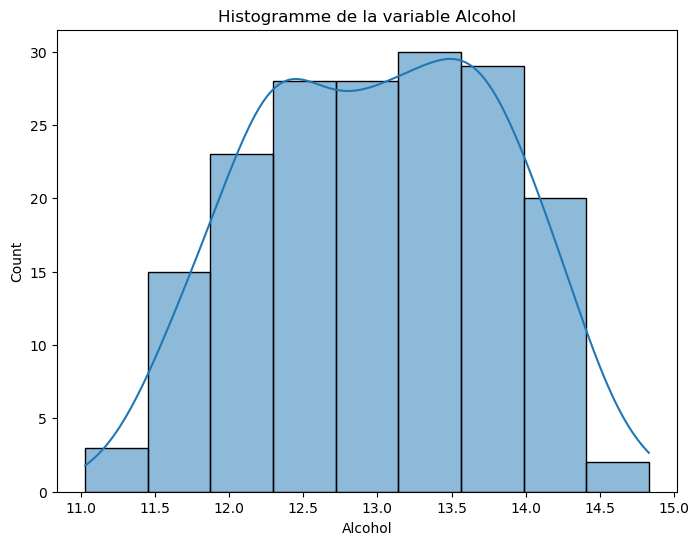

La variable Alcohol ne suit pas une loi normale (p-value=0.00034163202531285264)


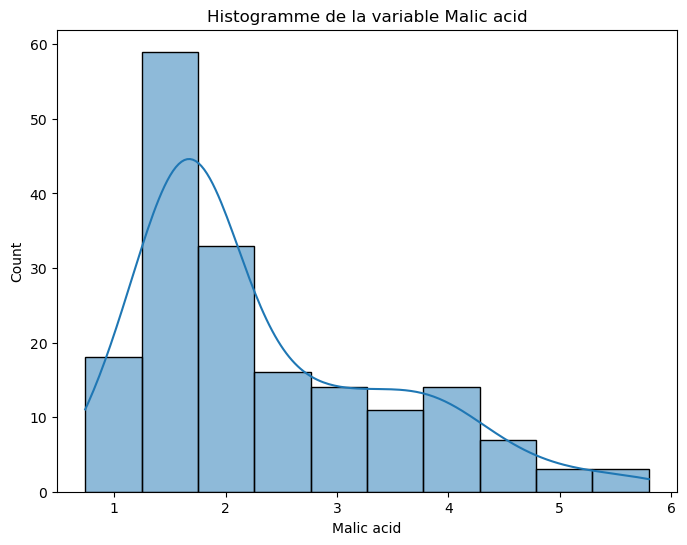

La variable Malic acid ne suit pas une loi normale (p-value=3.1742168603714762e-06)


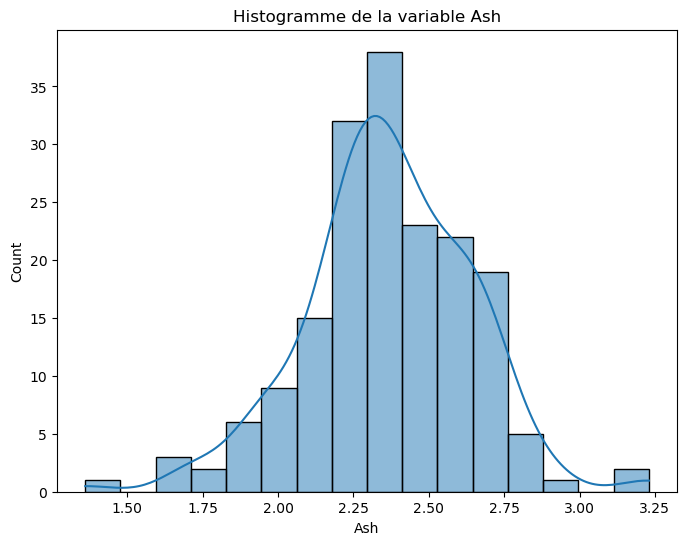

La variable Ash ne suit pas une loi normale (p-value=0.03631602067034469)


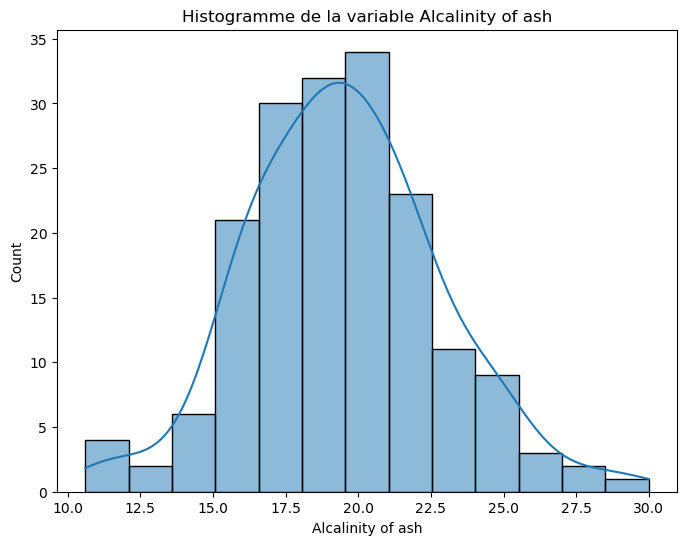

La variable Alcalinity of ash suit une loi normale (p-value=0.21004273588925534)


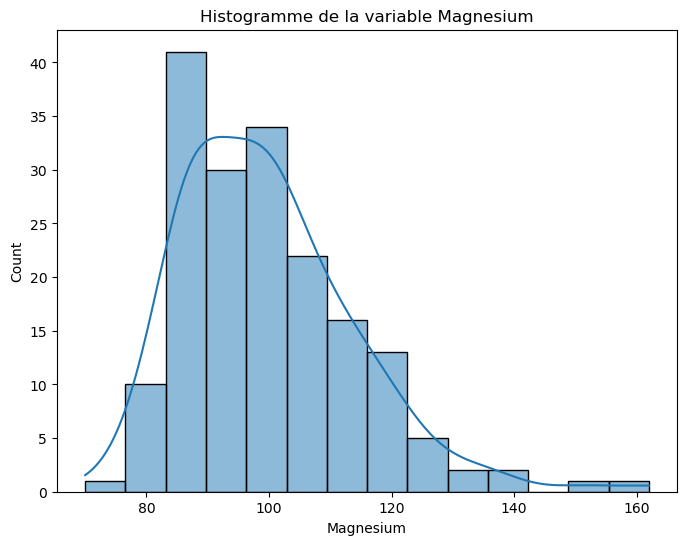

La variable Magnesium ne suit pas une loi normale (p-value=4.658884716268434e-09)


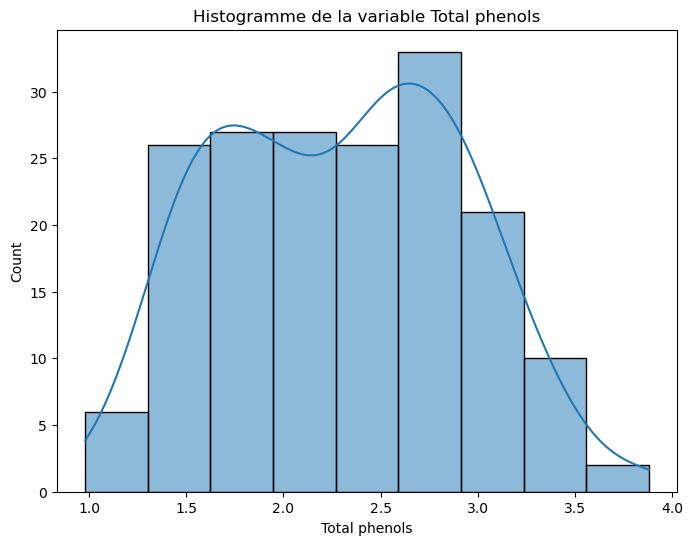

La variable Total phenols ne suit pas une loi normale (p-value=0.0005556667174637149)


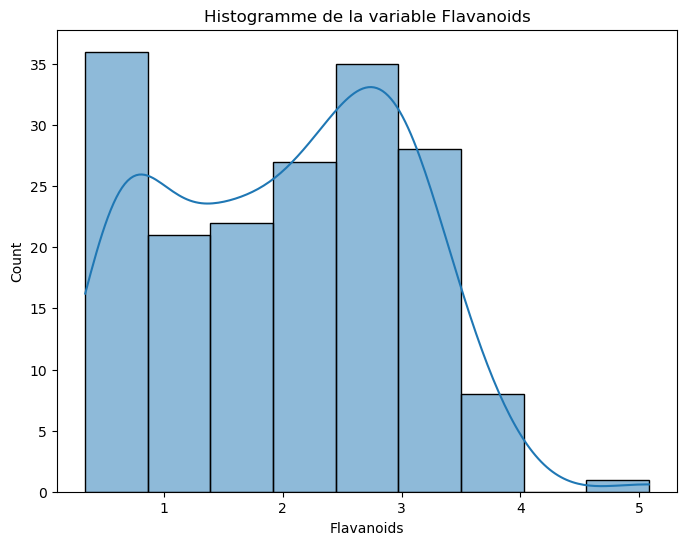

La variable Flavanoids ne suit pas une loi normale (p-value=0.00012693297763919295)


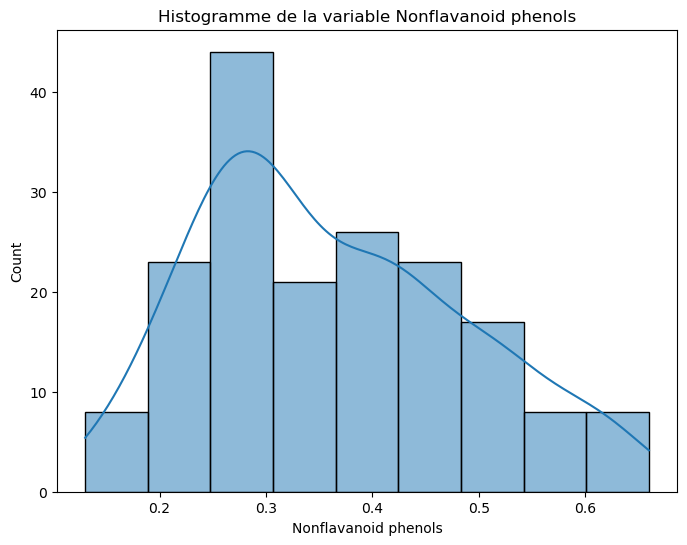

La variable Nonflavanoid phenols ne suit pas une loi normale (p-value=0.0026647025727076653)


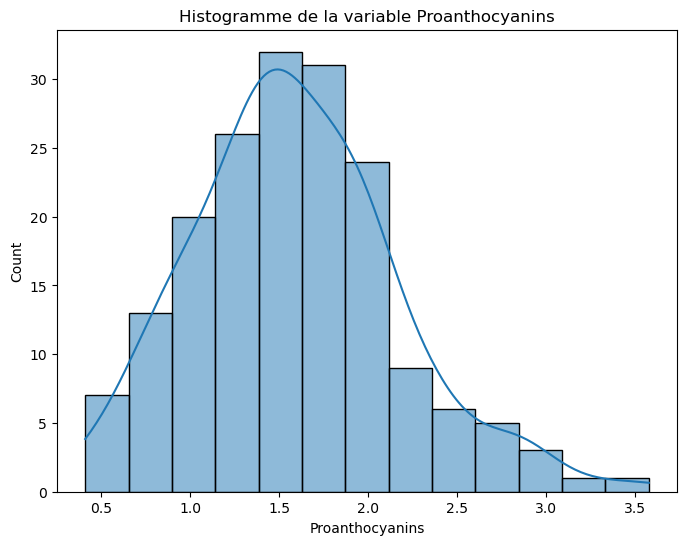

La variable Proanthocyanins ne suit pas une loi normale (p-value=0.008000813483971013)


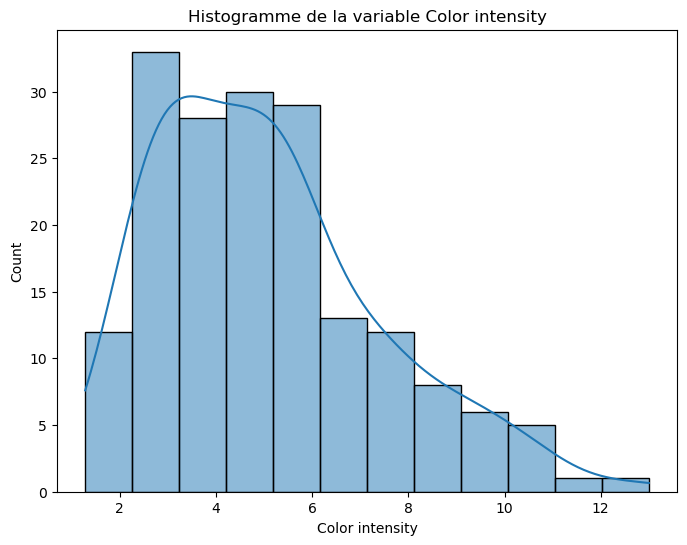

La variable Color intensity ne suit pas une loi normale (p-value=5.31947611640046e-05)


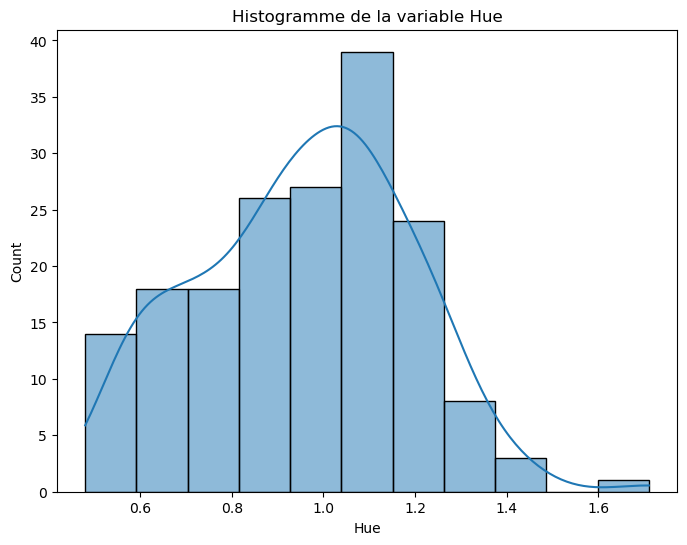

La variable Hue suit une loi normale (p-value=0.594729042205703)


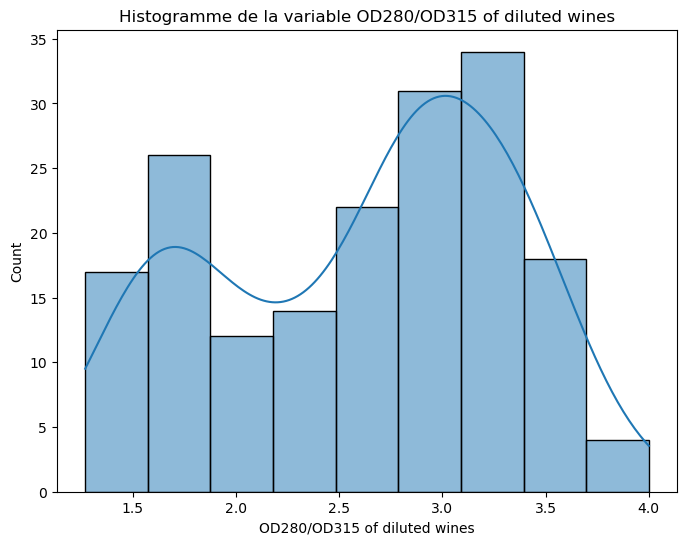

La variable OD280/OD315 of diluted wines ne suit pas une loi normale (p-value=4.8789809118220485e-11)


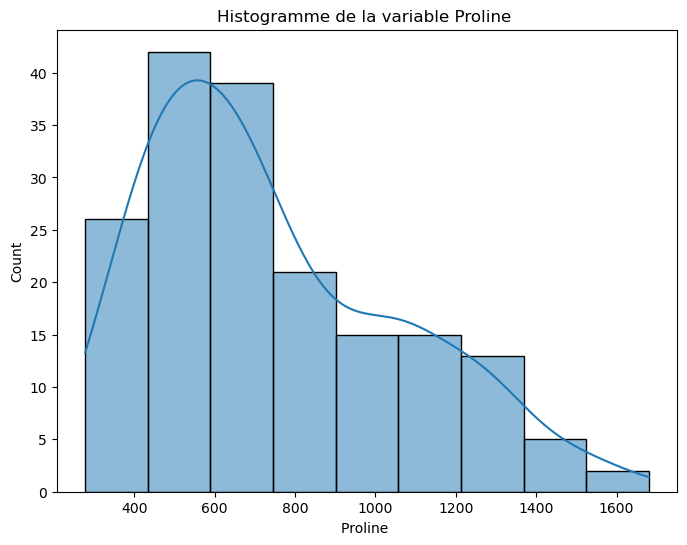

La variable Proline  ne suit pas une loi normale (p-value=0.0004256462644890612)


In [15]:
# Analyse de la normalité


# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in df.columns[1:]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(df[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")

<Axes: xlabel='class', ylabel='count'>

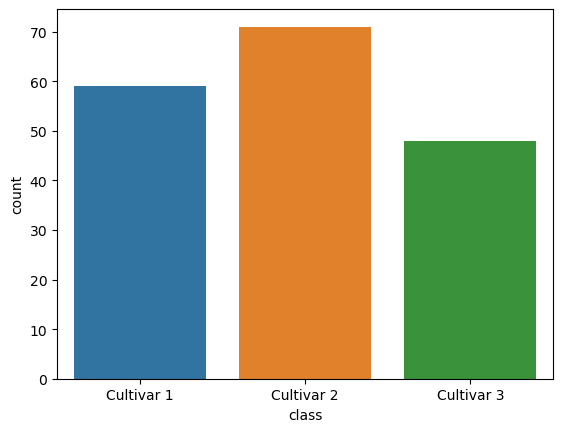

In [16]:
# Analyse de la variable qualitative

sns.countplot(x=df['class'])

([<matplotlib.patches.Wedge at 0x214d3736c20>,
 [Text(0.3436094134029147, 1.0449557746722609, 'Cultivar 2'),
  Text(-1.0106064575192055, -0.4343668818182187, 'Cultivar 1'),
  Text(0.7283164304833661, -0.8243513674932361, 'Cultivar 3')])

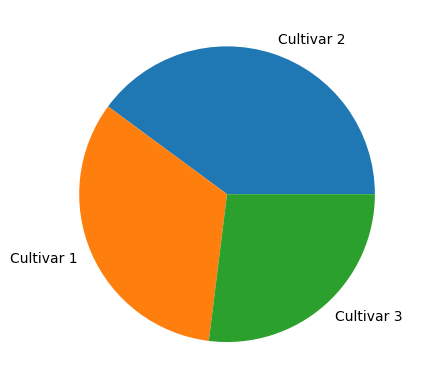

In [17]:
# Création d'un tableau de fréquences pour les différents cultivars
freq_table = (df['class'].value_counts())/len(df)

freq_table

#Création d'un diagramme circulaire pour le tableau de fréquence


plt.pie(freq_table,labels=freq_table.index)

La répartition reste relativement équilibrée entre les différents cultivars

# Analyse bivariées

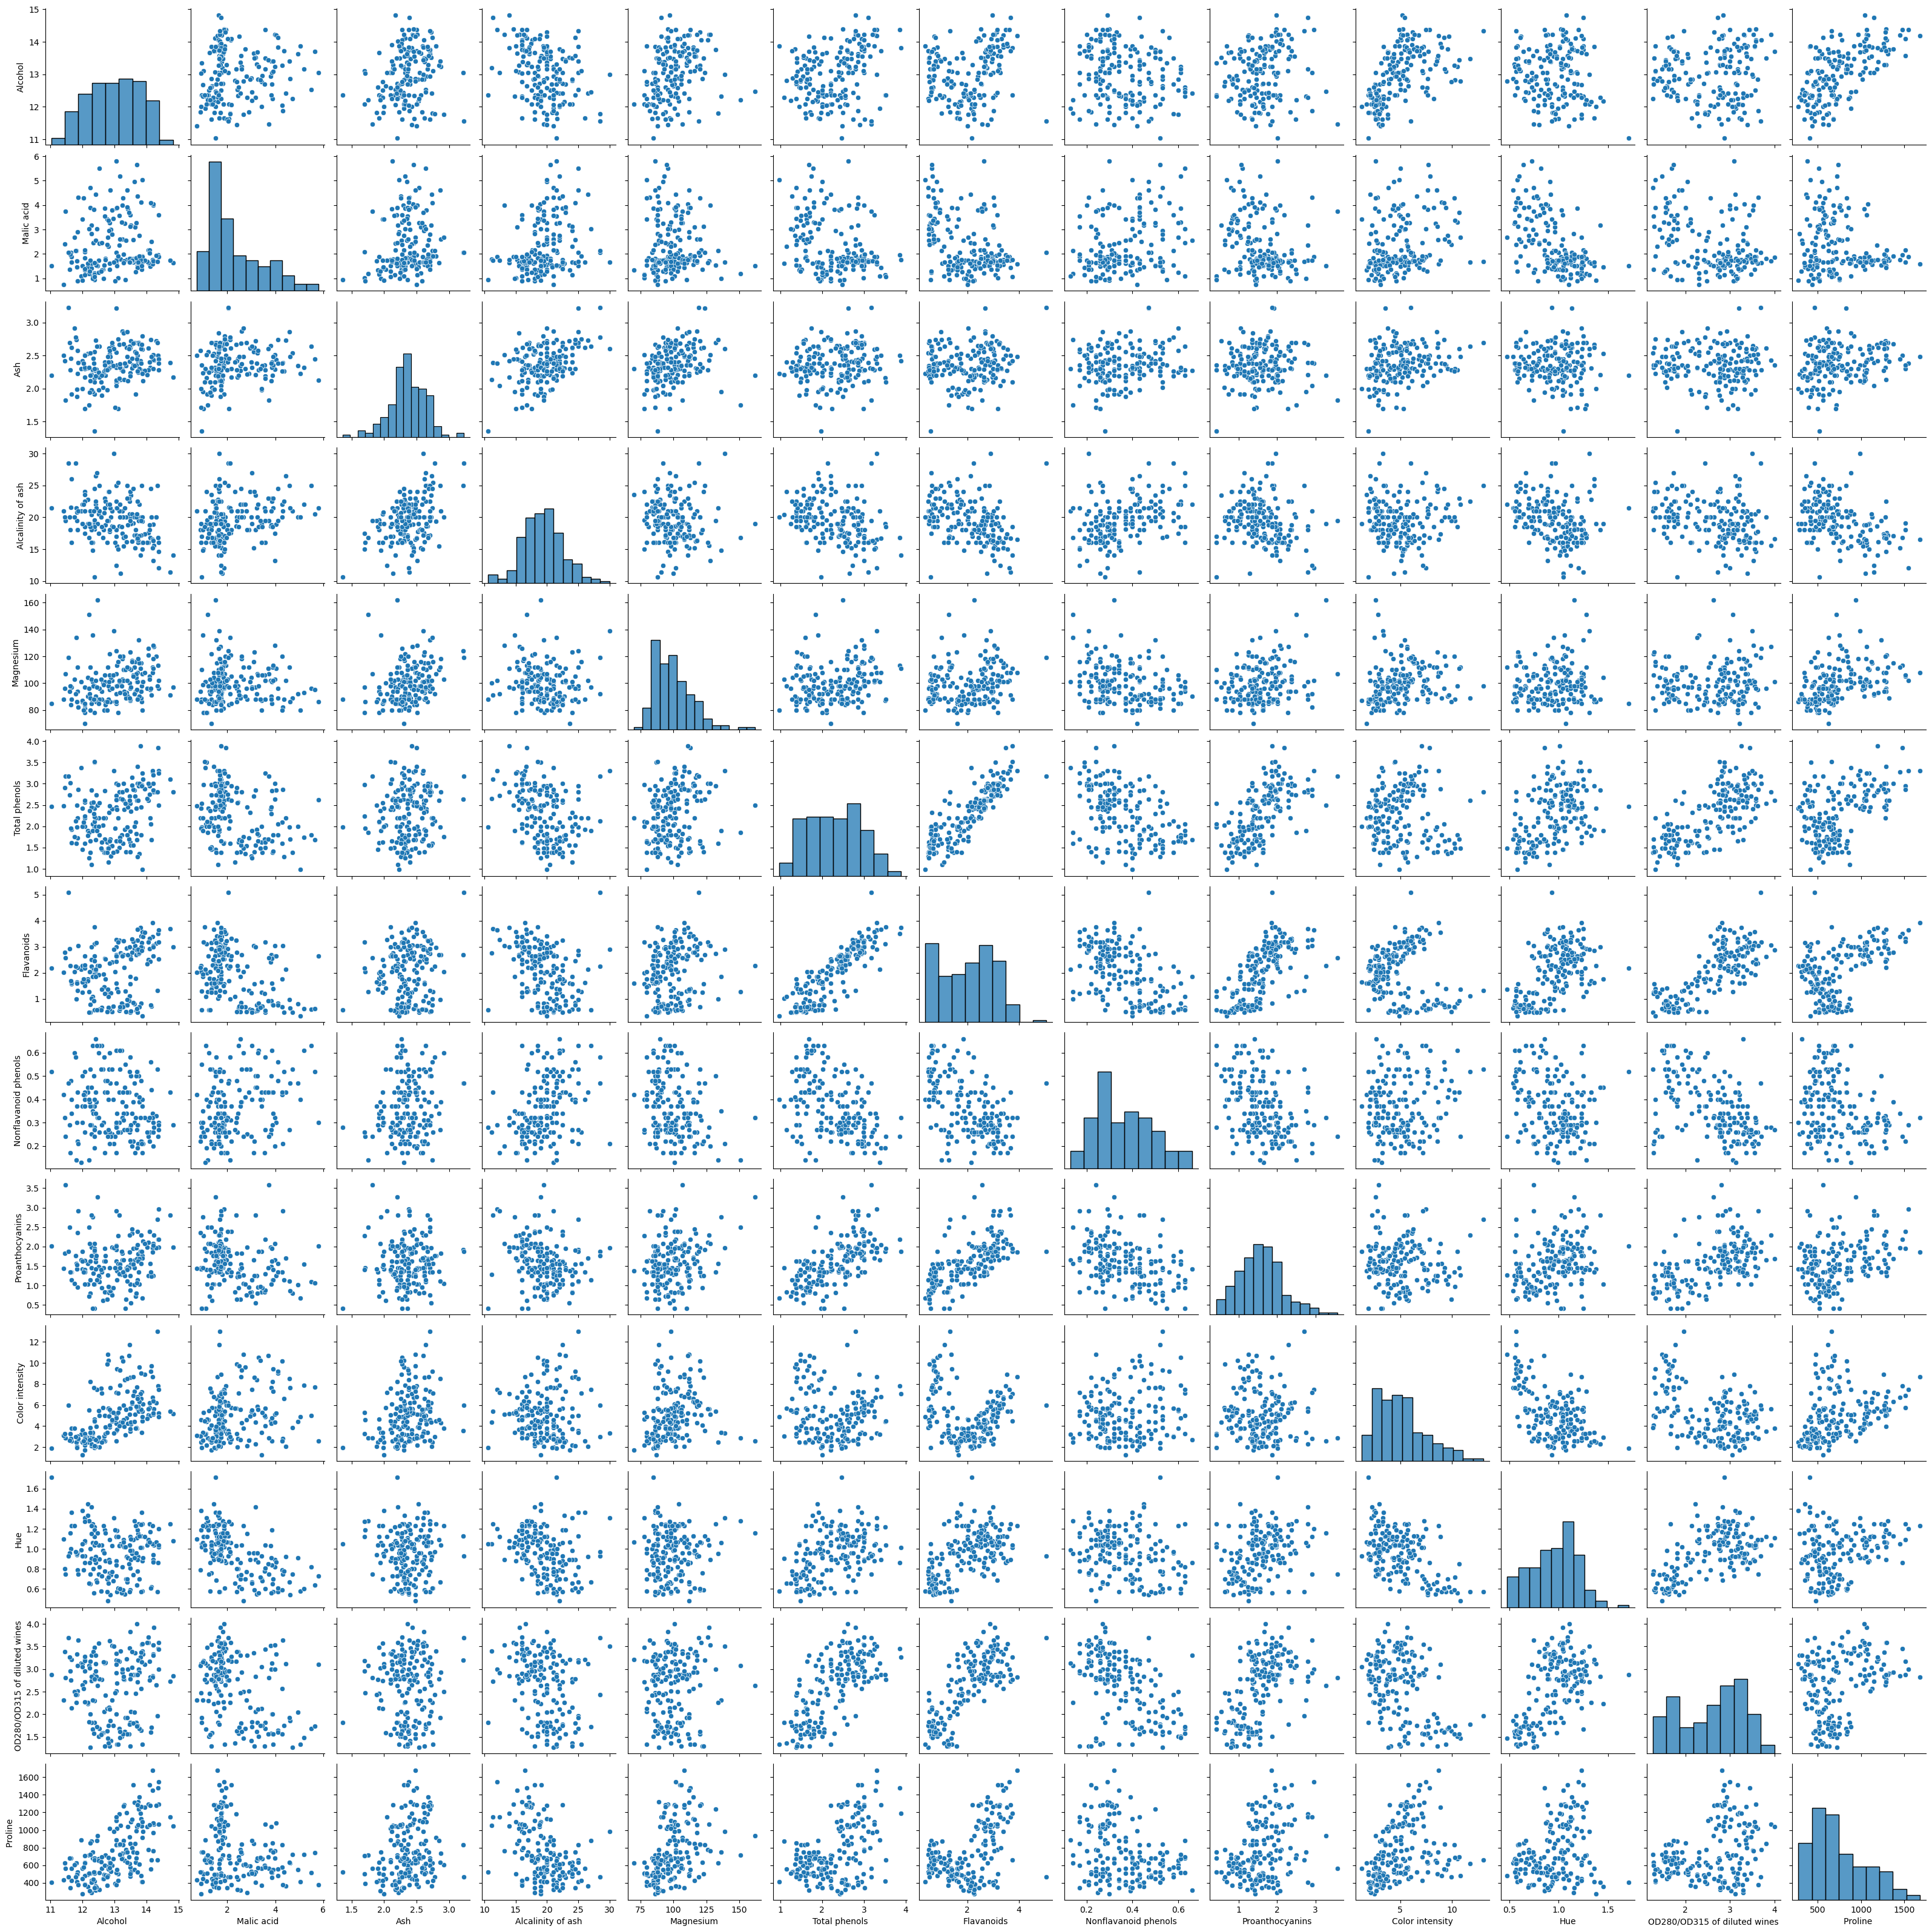

In [18]:
# Relation entre les variables quantitatives

sns.pairplot(df)

Le problème de la haute dimentionnalité est que l'analyse bivariée est difficilement interprétable

C:\Users\PC\AppData\Local\Temp\ipykernel_12492\1555525462.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

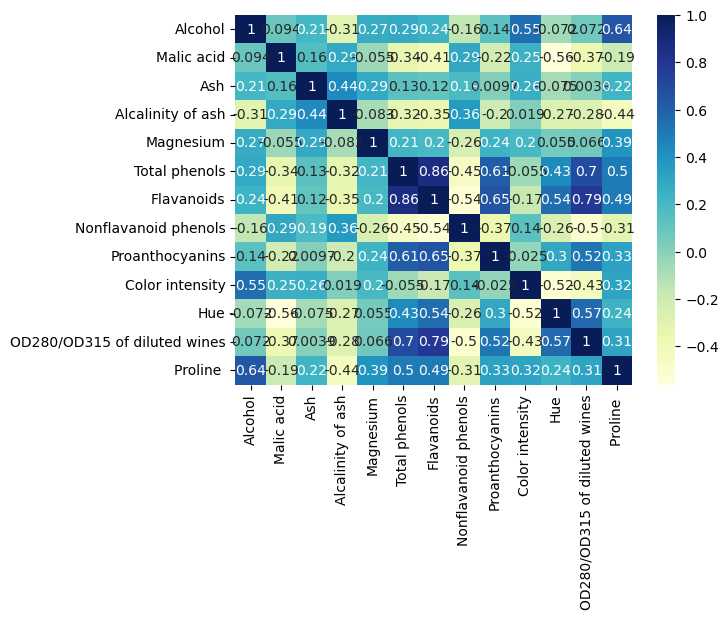

In [19]:
# Obtenir le tableau de corélation et la heatmap

corr_matrix = df.corr()

# Calcul des p-values pour chaque paire de variables
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")

Il est possible de voir des corrélations fortes entre certaines variables. Par exemple, Les flavonoïds avec la dilution OD280/OD315. Il y a aussi des corrélations négatives entre l'alcool et les Prolines. 

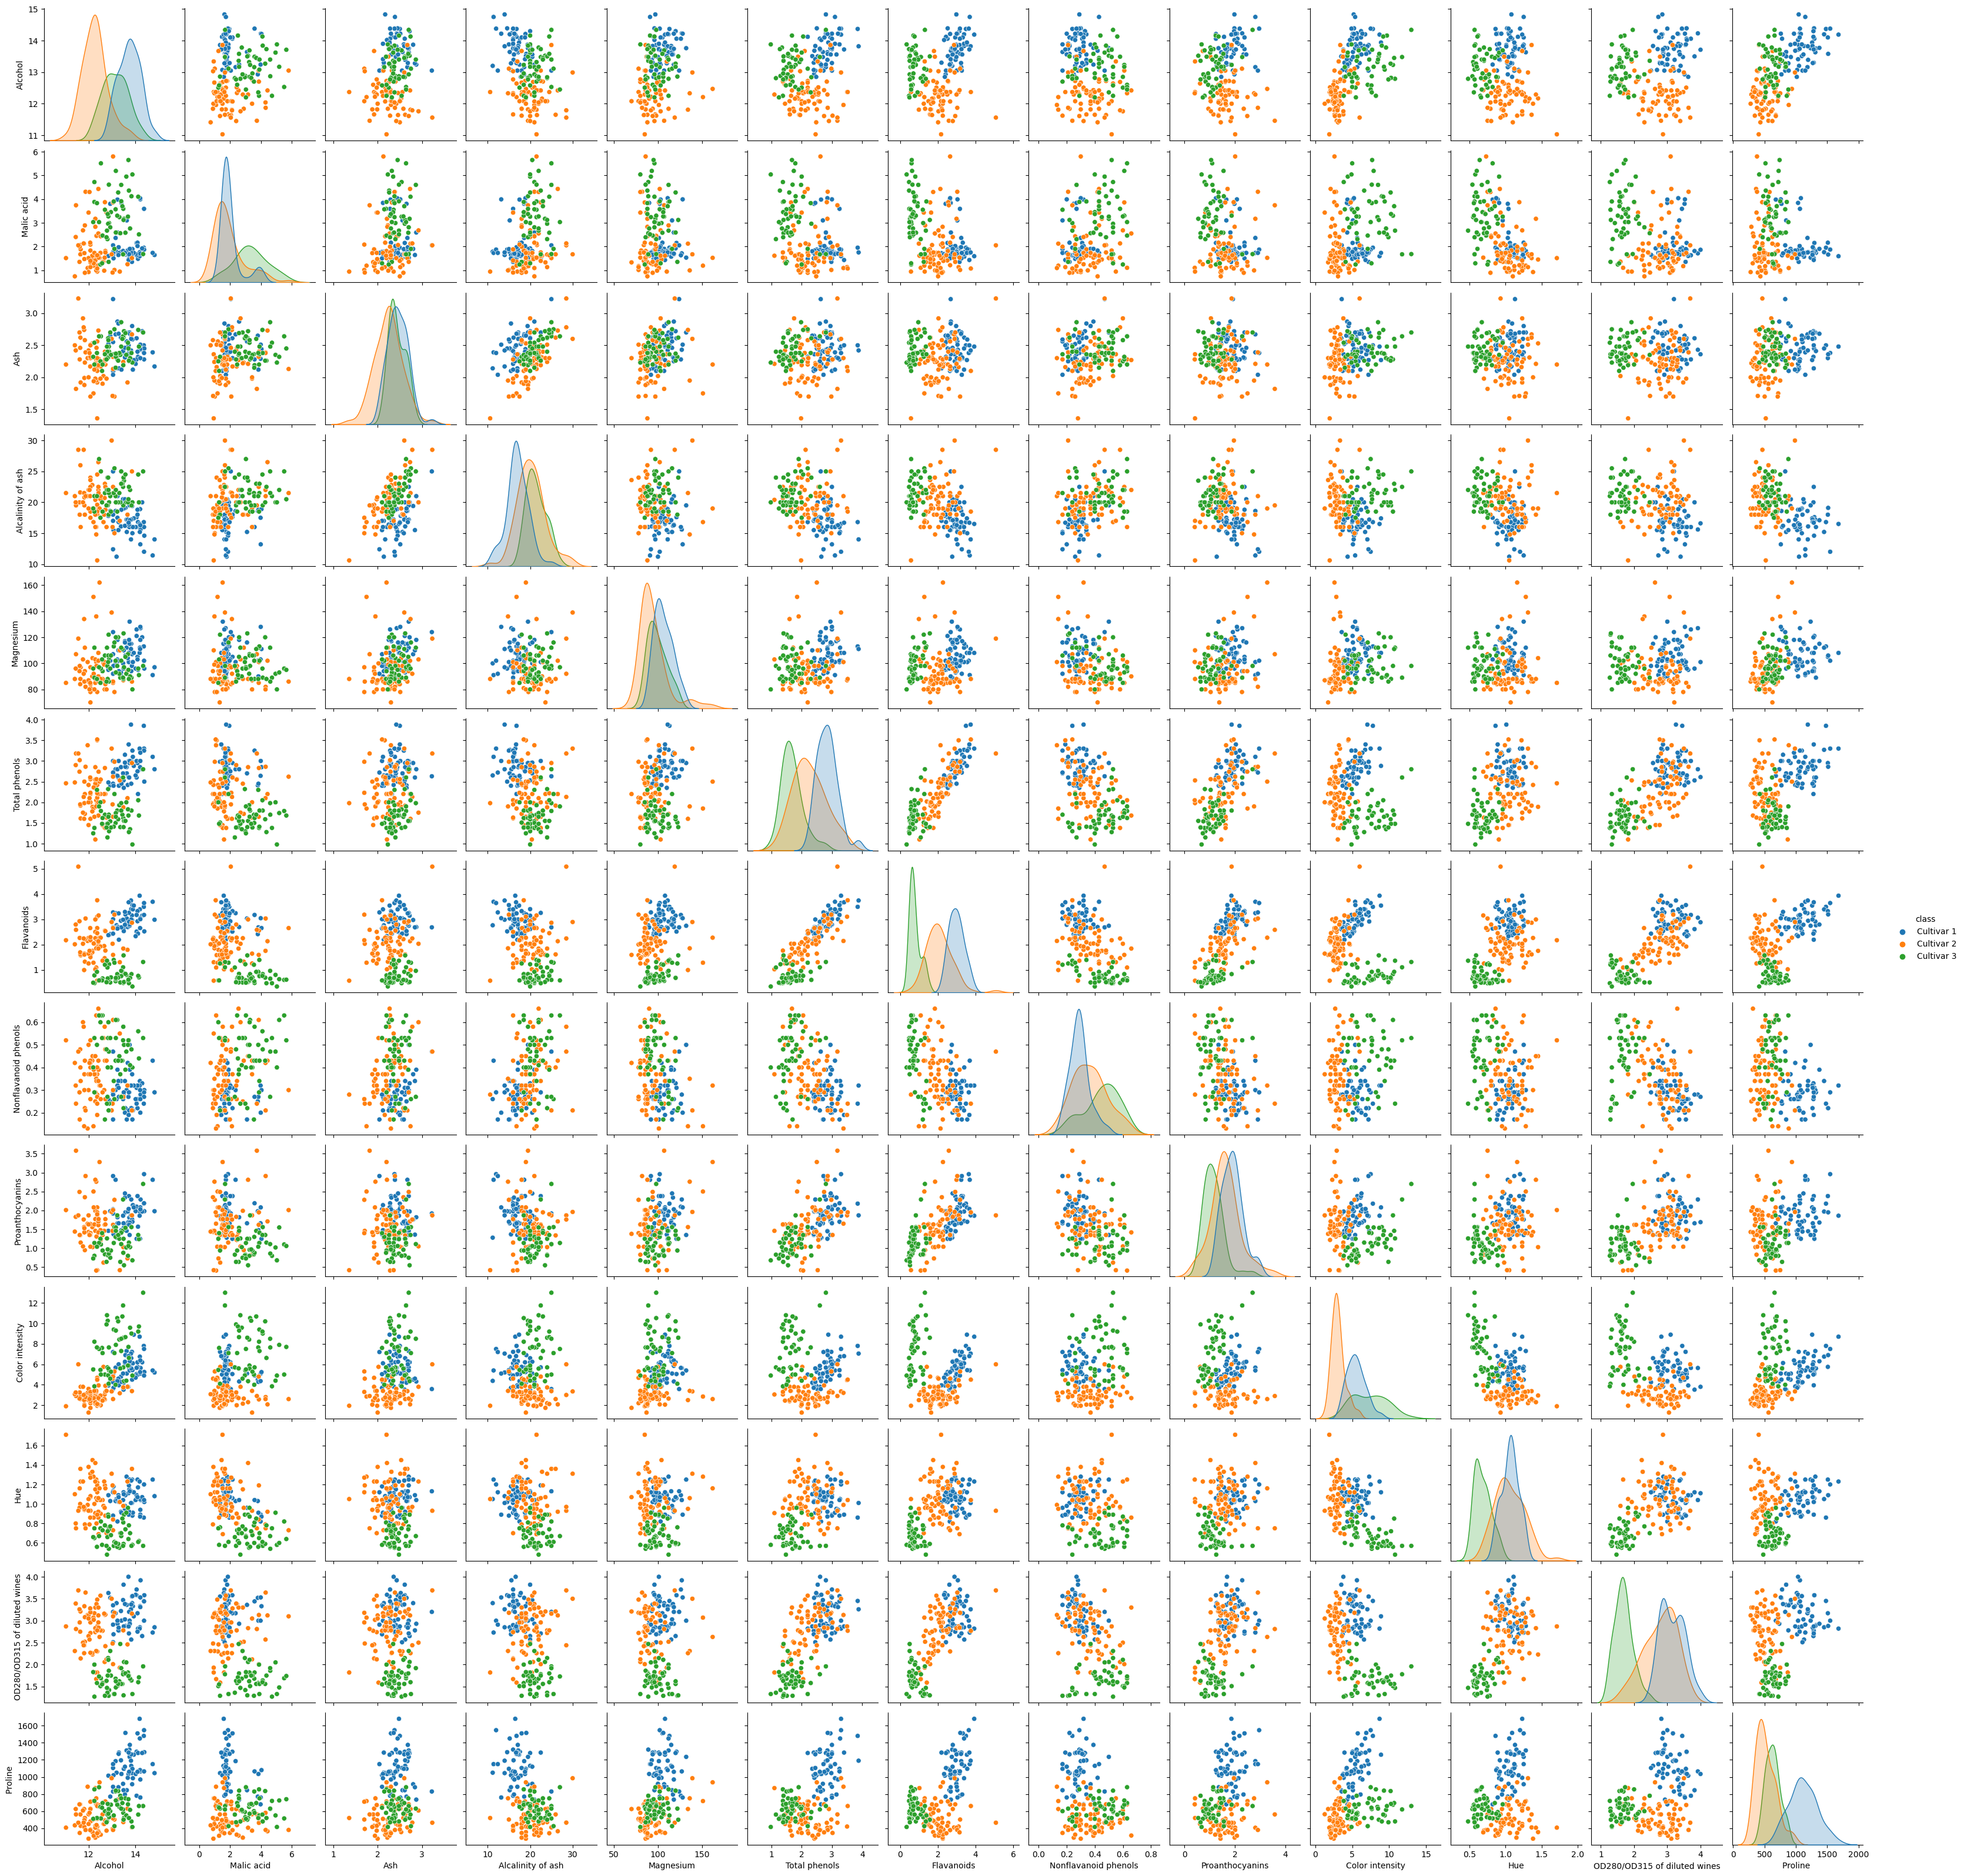

In [20]:
# pairplot

p=sns.pairplot(df, hue = 'class')

Il y a quelques clusters observables. Une idée de Machine Learning possible à appliquer sur ce dataset serait une SVM. 

In [21]:
 # Confirmation des liaison avec un test de Kruskal-Wallis pour chaque variable

for column in df.columns[1:]:
    _, p_value = stats.kruskal(*[df[column][df['class'] == variety] for variety in df['class'].unique()])
    if p_value < 0.05:
        print(f"La variable {column} est significativement différente entre les espèces (p-value={p_value})")
    else:
        print(f"La variable {column} n'est pas significativement différente entre les espèces (p-value={p_value})")


La variable Alcohol est significativement différente entre les espèces (p-value=1.6600250601216383e-24)
La variable Malic acid est significativement différente entre les espèces (p-value=1.357931639757843e-11)
La variable Ash est significativement différente entre les espèces (p-value=9.497749976424641e-06)
La variable Alcalinity of ash est significativement différente entre les espèces (p-value=9.404058619703899e-14)
La variable Magnesium est significativement différente entre les espèces (p-value=1.5450460673846685e-09)
La variable Total phenols est significativement différente entre les espèces (p-value=5.0306207978166115e-21)
La variable Flavanoids est significativement différente entre les espèces (p-value=4.70559397607555e-29)
La variable Nonflavanoid phenols est significativement différente entre les espèces (p-value=2.2150945192836892e-09)
La variable Proanthocyanins est significativement différente entre les espèces (p-value=1.2179725746793306e-13)
La variable Color intensity 

In [22]:
# Confirmation des liaisons avec un test de Kruskal-Wallis pour chaque variable
significant_vars = []
non_significant_vars = []

for column in df.columns[1:]:
    _, p_value = stats.kruskal(*[df[column][df['class'] == variety] for variety in df['class'].unique()])
    if p_value < 0.05:
        significant_vars.append(column)
        #print(f"La variable {column} est significativement différente entre les espèces (p-value={p_value})")
    else:
        non_significant_vars.append(column)
        #print(f"La variable {column} n'est pas significativement différente entre les espèces (p-value={p_value})")

print("Variables significativement différentes entre les espèces:", significant_vars)
print("Variables non significativement différentes entre les espèces:", non_significant_vars)


Variables significativement différentes entre les espèces: ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline ']
Variables non significativement différentes entre les espèces: []


## Analyse multivariée avec l'ACP

### Construction de l'ACP

In [23]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values



In [24]:
# Standardisation des données
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Réduction de dimension
pca = PCA()
X_pca=pca.fit_transform(X)

### Aide à l'interprétation

#### Choix du nombre d'axe

In [26]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(len(pca.explained_variance_))], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)

# Trier les valeurs propres dans l'ordre décroissant

comp

Dimension  Valeur propre  % variance expliquée  % cum. var. expliquée
0       Dim1   99201.789517                 100.0                  100.0
1       Dim2     172.535266                   0.0                  100.0
2       Dim3       9.438114                   0.0                  100.0
3       Dim4       4.991179                   0.0                  100.0
4       Dim5       1.228845                   0.0                  100.0
5       Dim6       0.841064                   0.0                  100.0
6       Dim7       0.278974                   0.0                  100.0
7       Dim8       0.151381                   0.0                  100.0
8       Dim9       0.112097                   0.0                  100.0
9      Dim10       0.071703                   0.0                  100.0
10     Dim11       0.037576                   0.0                  100.0
11     Dim12       0.021072                   0.0                  100.0
12     Dim13       0.008204                   0.0                  100.0

Text(3.25, 26, '25%')

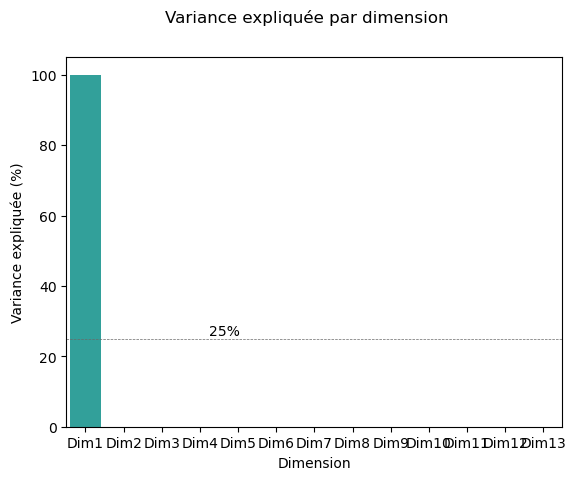

In [27]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

In [28]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
df_cos_squared.index = df.columns[:-1]

print(df_cos_squared)

                                   PC1           PC2           PC3       PC4  \
class                         0.000003  4.637822e-07  3.798825e-08  0.000022   
Alcohol                       0.000001  4.643947e-06  2.110201e-05  0.000700   
Malic acid                    0.000285  1.488482e-02  2.702693e-03  0.880957   
Ash                           0.020007  2.572481e-02  9.550781e-05  0.109538   
Alcalinity of ash             0.000414  3.756261e-01  4.070538e-04  0.004141   
Magnesium                     0.037683  5.512661e-01  1.743306e-03  0.000579   
Total phenols                 0.852447  2.253299e-02  2.025860e-03  0.000994   
Flavanoids                    0.081123  4.182787e-03  2.230230e-02  0.000230   
Nonflavanoid phenols          0.007500  2.453026e-04  5.424301e-03  0.000004   
Proanthocyanins               0.000005  3.425960e-04  7.534180e-03  0.000013   
Color intensity               0.000224  5.376671e-04  9.101363e-01  0.002790   
Hue                           0.000245  

In [29]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = X.shape[1]
feature_names=df.columns[0:13]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)

                               PC1_contrib   PC2_contrib  PC3_contrib  \
class                             0.273118  2.498632e-04     0.002687   
Alcohol                           0.046008  8.012446e-04     0.140485   
Malic acid                        0.003769  3.640841e-03     0.025508   
Ash                               2.164687  1.207097e-01     8.314571   
Alcalinity of ash                31.671728  1.723090e+02     0.008370   
Magnesium                         0.097194  1.329932e-04     0.015469   
Total phenols                     0.243679  4.638607e-07     0.068904   
Flavanoids                        0.001503  3.165355e-04     0.001723   
Nonflavanoid phenols              0.035785  4.320977e-03     0.005739   
Proanthocyanins                   0.537237  3.934161e-02     0.801419   
Color intensity                   0.002914  1.003586e-04     0.006369   
Hue                               0.049296  2.107962e-03     0.046676   
OD280/OD315 of diluted wines  99166.662600  5.45053

In [30]:
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Convertir les contributions en pourcentage
variable_contrib_percent = variable_contributions / eigenvalues * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=feature_names)

print(variable_contrib_df)

                              PC1_contrib   PC2_contrib  PC3_contrib  \
class                            0.000275  1.448186e-04     0.028473   
Alcohol                          0.000046  4.643947e-04     1.488482   
Malic acid                       0.000004  2.110201e-03     0.270269   
Ash                              0.002182  6.996233e-02    88.095683   
Alcalinity of ash                0.031927  9.986888e+01     0.088686   
Magnesium                        0.000098  7.708175e-05     0.163901   
Total phenols                    0.000246  2.688498e-07     0.730056   
Flavanoids                       0.000002  1.834613e-04     0.018254   
Nonflavanoid phenols             0.000036  2.504402e-03     0.060809   
Proanthocyanins                  0.000542  2.280207e-02     8.491306   
Color intensity                  0.000003  5.816703e-05     0.067484   
Hue                              0.000050  1.221757e-03     0.494546   
OD280/OD315 of diluted wines    99.964590  3.159083e-02     0.00

In [31]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

     PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
0       0.574713     1.504046     0.583428     0.007041     0.209585   
1       0.520265     0.093712     2.770924     0.084031     0.108026   
2       1.086751     0.139155     0.073766     0.093704     0.066243   
3       3.044759     0.000121     0.050081     0.032974     0.337076   
4       0.000758     1.113206     0.018297     0.208462     0.034937   
..           ...          ...          ...          ...          ...   
173     0.000276     0.067148     0.364538     1.121060     2.522446   
174     0.000056     0.017756     1.105695     0.274688     0.623693   
175     0.044313     1.147946     0.298024     2.615764     0.511103   
176     0.049463     1.135086     0.190379     1.548720     0.035068   
177     0.197915     0.000148     1.887080     1.357636     0.000023   

     PC6_contrib  PC7_contrib  PC8_contrib  PC9_contrib  PC10_contrib  \
0       0.215562     0.773212     0.147786     2.464735      0

Comme la variance expliquée est de 100% pour la dimension 1 et que la contribution pour la PC1 est de 100% pour la variable OD280/OD315 of diluted wines. Cela signifie qu'il y a une dépendance linéaire. 

Reprenons l'ACP sans la dernière variable

In [68]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 0].values



In [69]:
# Standardisation des données
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)

In [70]:
# Réduction de dimension
pca = PCA()
X_pca=pca.fit_transform(X_scaled)

In [71]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(len(pca.explained_variance_))], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)

# Trier les valeurs propres dans l'ordre décroissant

comp

Dimension  Valeur propre  % variance expliquée  % cum. var. expliquée
0       Dim1       4.420792                  37.0                   37.0
1       Dim2       2.187587                  18.0                   55.0
2       Dim3       1.427590                  12.0                   67.0
3       Dim4       0.892890                   7.0                   74.0
4       Dim5       0.820423                   7.0                   81.0
5       Dim6       0.635525                   5.0                   86.0
6       Dim7       0.550978                   5.0                   91.0
7       Dim8       0.348684                   3.0                   94.0
8       Dim9       0.261002                   2.0                   96.0
9      Dim10       0.247857                   2.0                   98.0
10     Dim11       0.170462                   1.0                   99.0
11     Dim12       0.104006                   1.0                  100.0

Text(3.25, 26, '25%')

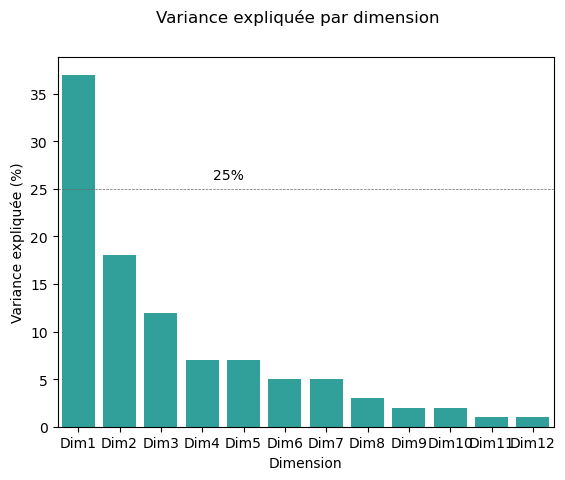

In [72]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

In [78]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
df_cos_squared.index = df.columns[1:-1]

print(df_cos_squared)

ValueError: Length mismatch: Expected axis has 2 elements, new values have 9 elements

In [53]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = X.shape[1]
feature_names=df.columns[0:12]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)

                      PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  \
class                    0.050186     0.048816     0.198194     0.041642   
Alcohol                  0.003837     0.149485     0.128757     0.295679   
Malic acid               0.006140     0.016206     0.001485     0.006358   
Ash                      0.087999    10.953487     0.055872     0.054158   
Alcalinity of ash      203.976526     0.005720     0.006180     0.000886   
Magnesium                0.018477     0.052288     0.007754     0.216803   
Total phenols            0.039200     0.166477     0.067191     0.603467   
Flavanoids               0.001030     0.002222     0.000593     0.001581   
Nonflavanoid phenols     0.018604     0.016457     0.004498     0.111871   
Proanthocyanins          0.225772     0.052292     5.006890     0.067027   
Color intensity          0.000157     0.005980     0.016446     0.006834   
Hue                      0.002230     0.061742     0.118991     0.186766   

           

In [54]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

     PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
0       2.060309     0.625027     0.003108     0.169323     0.089690   
1       0.000497     3.413468     0.000595     0.144237     0.007293   
2       0.004902     0.055521     0.016158     0.711070     0.348051   
3       0.497747     0.339044     0.514520     1.500024     0.254436   
4       0.910787     0.142326     0.228095     0.063381     0.279698   
..           ...          ...          ...          ...          ...   
173     0.060867     0.139369     1.245625     1.458895     2.459726   
174     0.013663     0.800113     0.547726     0.318528     0.135006   
175     1.139182     0.156673     2.335385     0.977560     0.056886   
176     1.136712     0.115640     1.366461     0.401874     0.681715   
177     0.037985     1.461900     1.889721     0.000005     0.279579   

     PC6_contrib  PC7_contrib  PC8_contrib  PC9_contrib  PC10_contrib  \
0       0.334869     0.152422     2.578357     0.059055      0

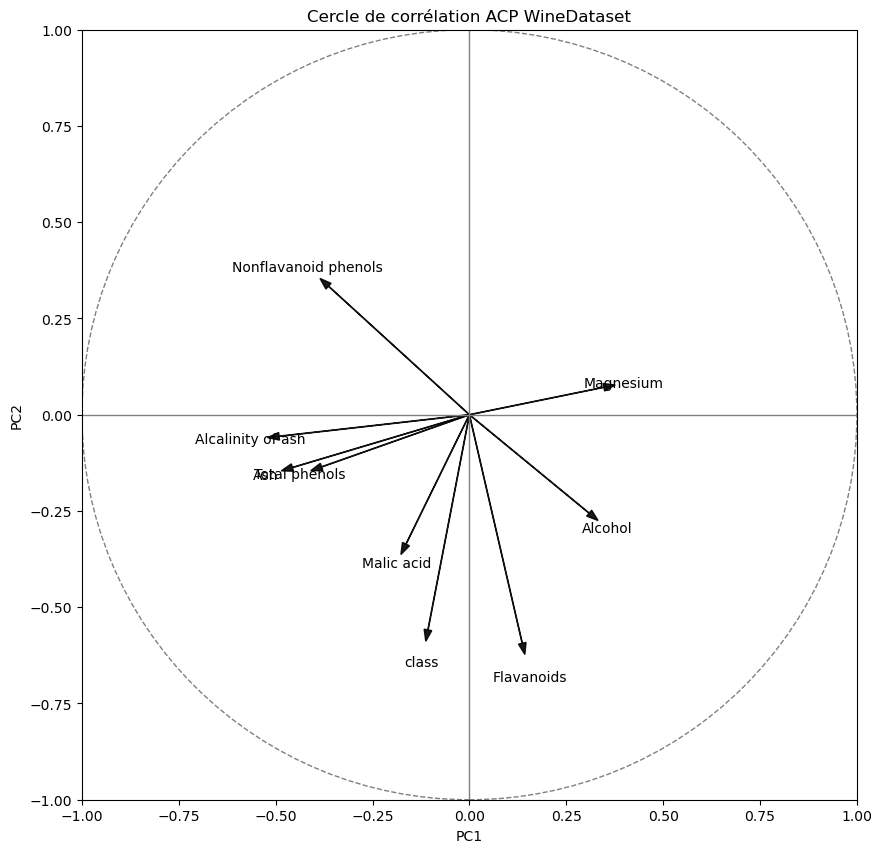

In [77]:
# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP WineDataset')

# Afficher la figure
plt.show()

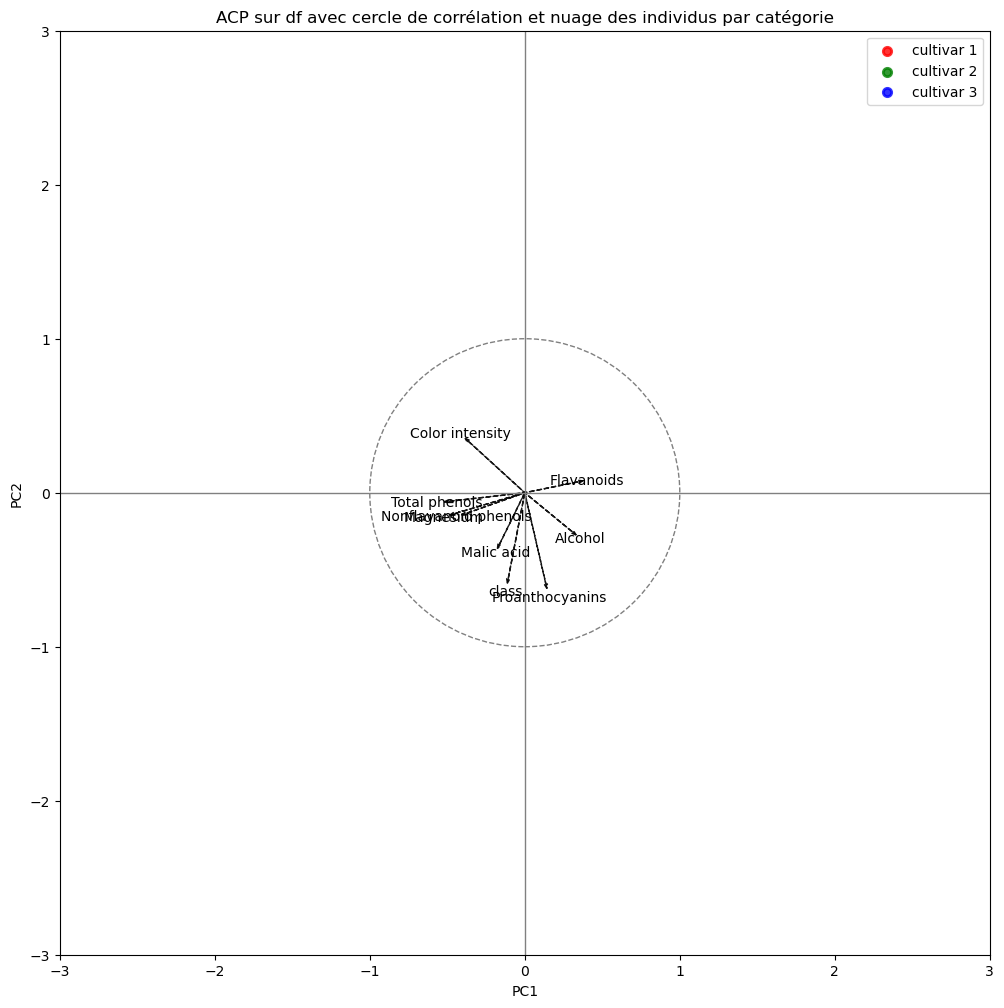

In [76]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 0].values

# Standardisation des données
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction de dimension
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)




# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]

# Créer la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Visualiser les individus avec les couleurs
colors = ['r', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], ['cultivar 1', 'cultivar 2', 'cultivar 3']):
    plt.scatter(df_pca[classes == 'cultivar '+str(i), 0], df_pca[classes == 'cultivar '+str(i), 1], color=color, alpha=.8, lw=lw, label=target_name)

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02, linestyle='--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, df.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP sur df avec cercle de corrélation et nuage des individus par catégorie')

# Afficher la légende
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Afficher la figure
plt.show()
